In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

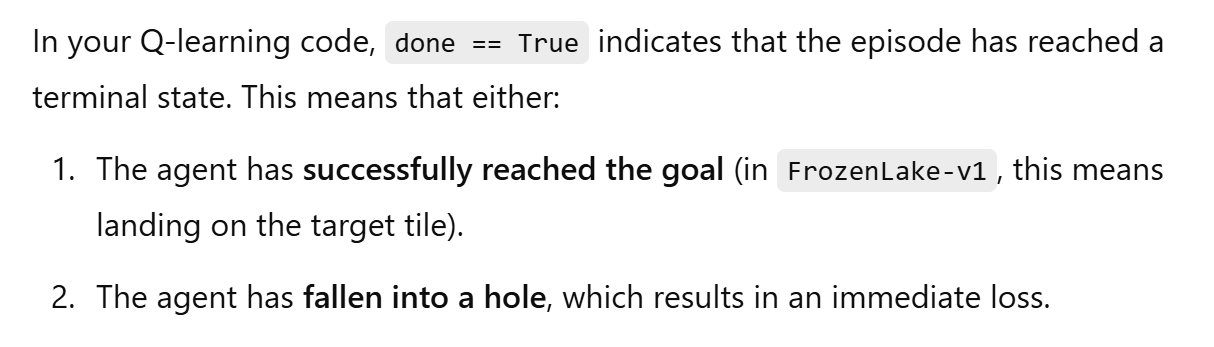

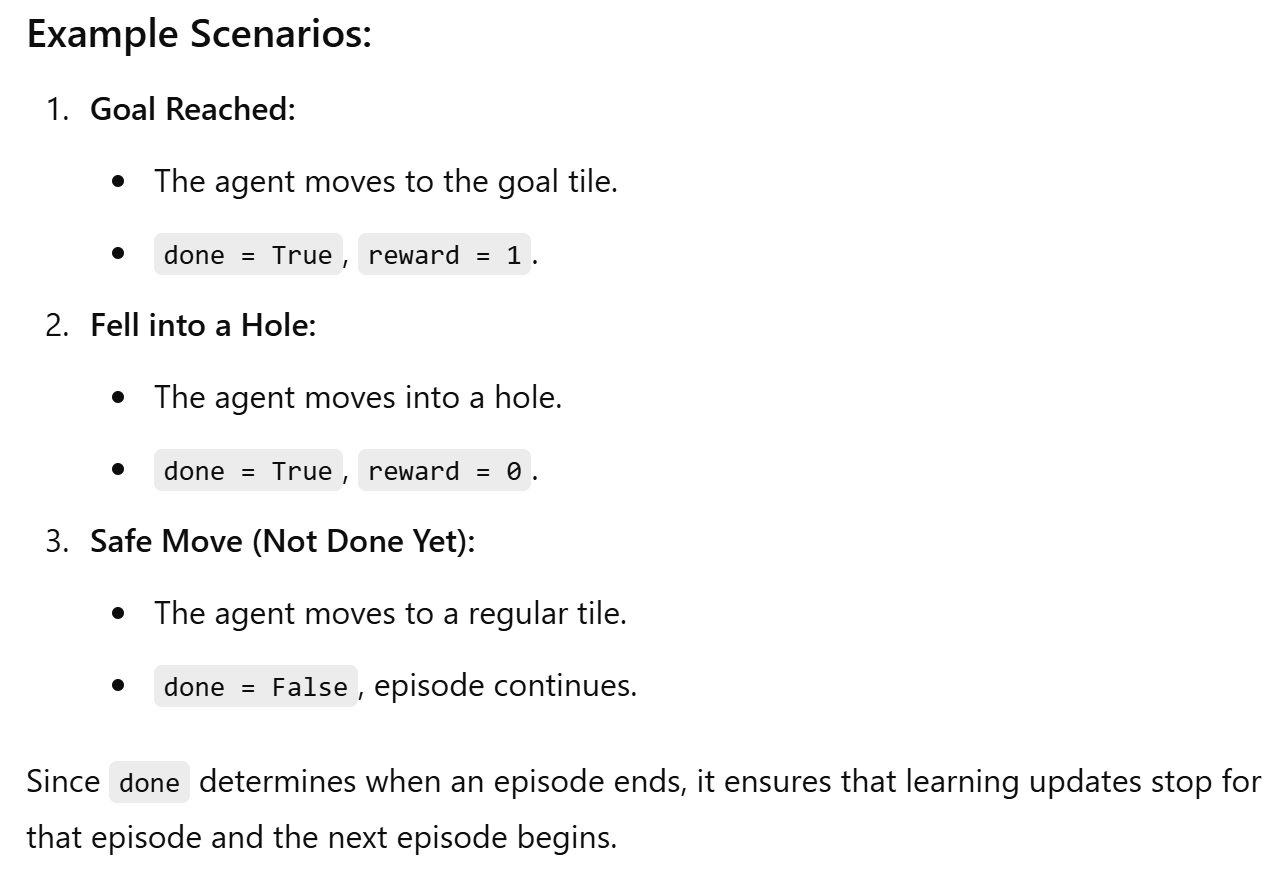

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


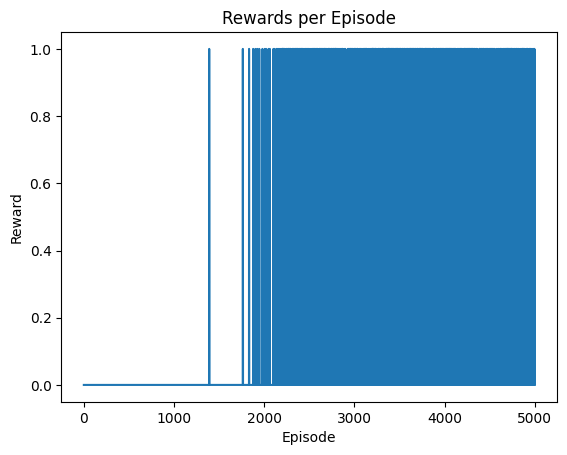

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize environment
env = gym.make('FrozenLake-v1')

# Set parameters
alpha = 0.1 # learning rate
gamma = 0.99 # discount factor
epsilon = 0.2 # exploration rate
num_episodes = 5000

# Initialize Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Initialize list to store rewards per episode
rewards_list = []

# Run Q-learning algorithm
for i in range(num_episodes):
    # Reset environment
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        # Epsilon-greedy policy
        if np.random.uniform() < epsilon:
            action = env.action_space.sample() # Random Exploration
        else:
            action = np.argmax(Q[state,:]) # Explotation

        # Take action and observe new state and reward
        new_state, reward, done, _ = env.step(action)

        # Update Q-value using TD target
        Q[state, action] = Q[state, action] + alpha * (reward + gamma*np.max(Q[new_state, :]) - Q[state, action])

        state = new_state
        episode_reward += reward

    rewards_list.append(episode_reward)

# Plot rewards per episode
plt.plot(rewards_list)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards per Episode')
plt.show()
